# Maximum Drawdown and Calmar Ratio

> __Motivation__: The most fundemental question: What is the maxmum risk (mxsimum loss) that I can loss from this trade?  

__Formula__
$\text{Calmar ratio} = \frac{Reward}{\text{Tail Risk}} = \frac{CAGR}{\text{Max Drawdown}}$

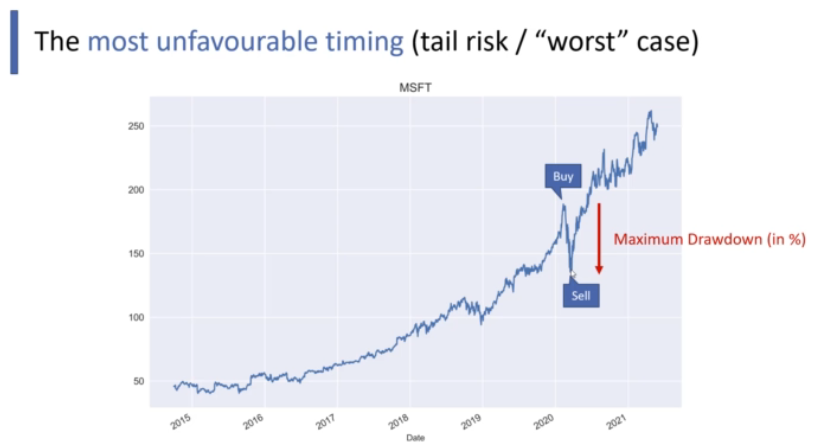

What is the period time that the drawdown will cover itself back? 
> The __Max Drewdown duration__ is the worst (the maximum/longest) amount of time an investment has seen between peaks (equaly highs). 

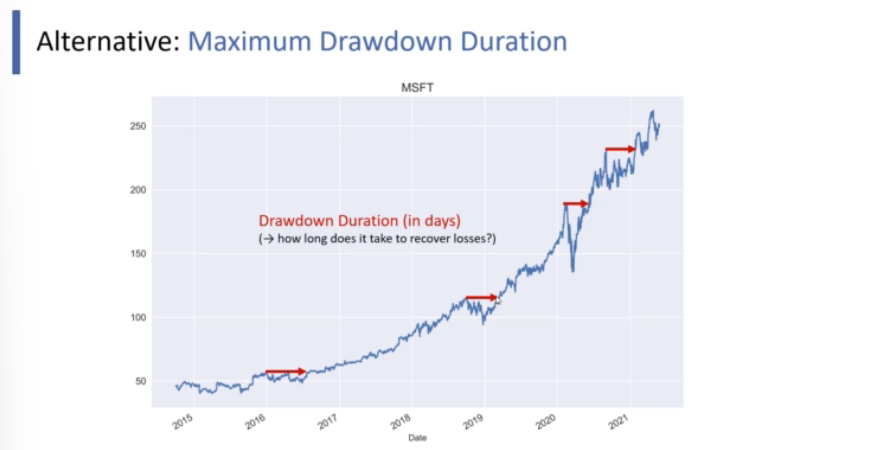

---

# Getting ready

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
returns = pd.read_csv("../Data/returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


In [3]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3139 entries, 2010-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GBP_USD  3139 non-null   float64
 1   USD_GBP  3139 non-null   float64
 2   Levered  3139 non-null   float64
 3   Low_Vol  3139 non-null   float64
 4   Random   3139 non-null   float64
 5   Neutral  3139 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 171.7 KB


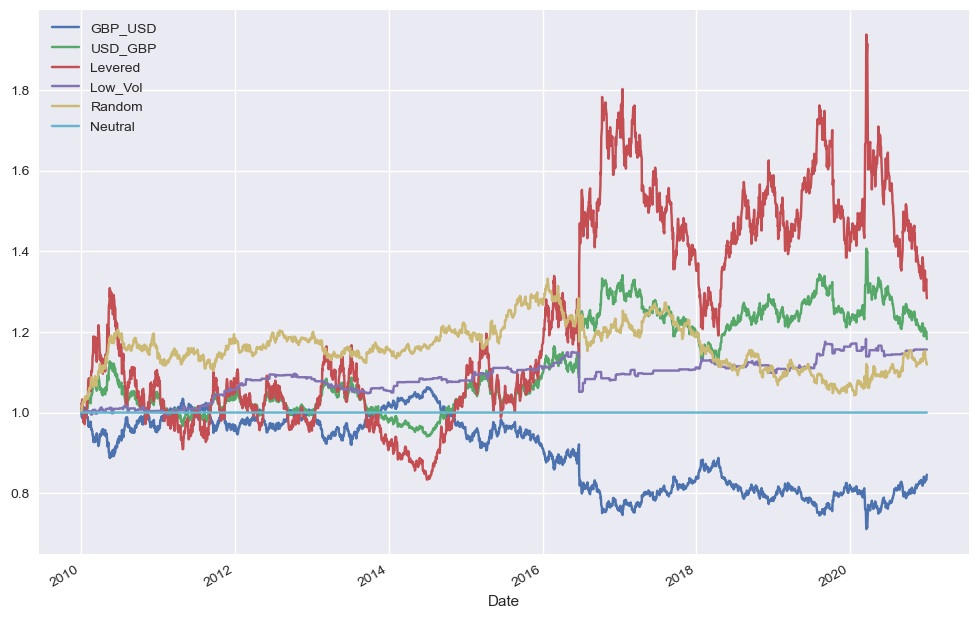

In [4]:
returns.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

---

# Maximum Drawdown

> What is the maximum risk (loss) that I can get from an instrument?

In [5]:
# the example on this symbol
symbol = "USD_GBP"

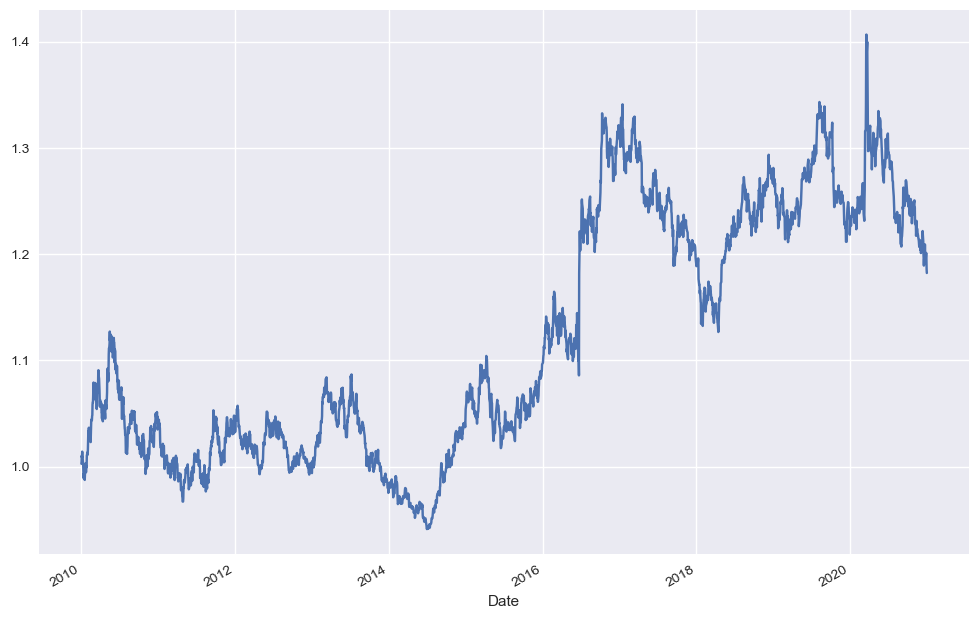

In [6]:
# Compute the cumelative return of that symbol
returns[symbol].cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [7]:
instr = returns[symbol].to_frame().copy()
instr

,USD_GBP
Date,
2010-01-02,0.002733
2010-01-03,0.001727
2010-01-04,0.005786
2010-01-05,-0.001687
2010-01-06,0.005446
...,...
2020-12-23,-0.005004
2020-12-27,0.008278
2020-12-28,-0.003799


In [8]:
# cumulative returns (normalized prices with Base == 1)
instr["creturns"] = instr.cumsum().apply(np.exp)

In [9]:
# On the cumelative return, we compute the cumelative max
# you'll see it visualy and understed.
# basically, its compute the cumelative max over the time.
instr["cummax"] = instr.creturns.cummax() # cumulative maximum of creturns

In [10]:
instr

,USD_GBP,creturns,cummax
Date,,,
2010-01-02,0.002733,1.002737,1.002737
2010-01-03,0.001727,1.004470,1.004470
2010-01-04,0.005786,1.010299,1.010299
2010-01-05,-0.001687,1.008596,1.010299
2010-01-06,0.005446,1.014104,1.014104
...,...,...,...
2020-12-23,-0.005004,1.191265,1.406706
2020-12-27,0.008278,1.201167,1.406706
2020-12-28,-0.003799,1.196612,1.406706


__Plot the `cumelative returns` and the `cumelative sum` over time__

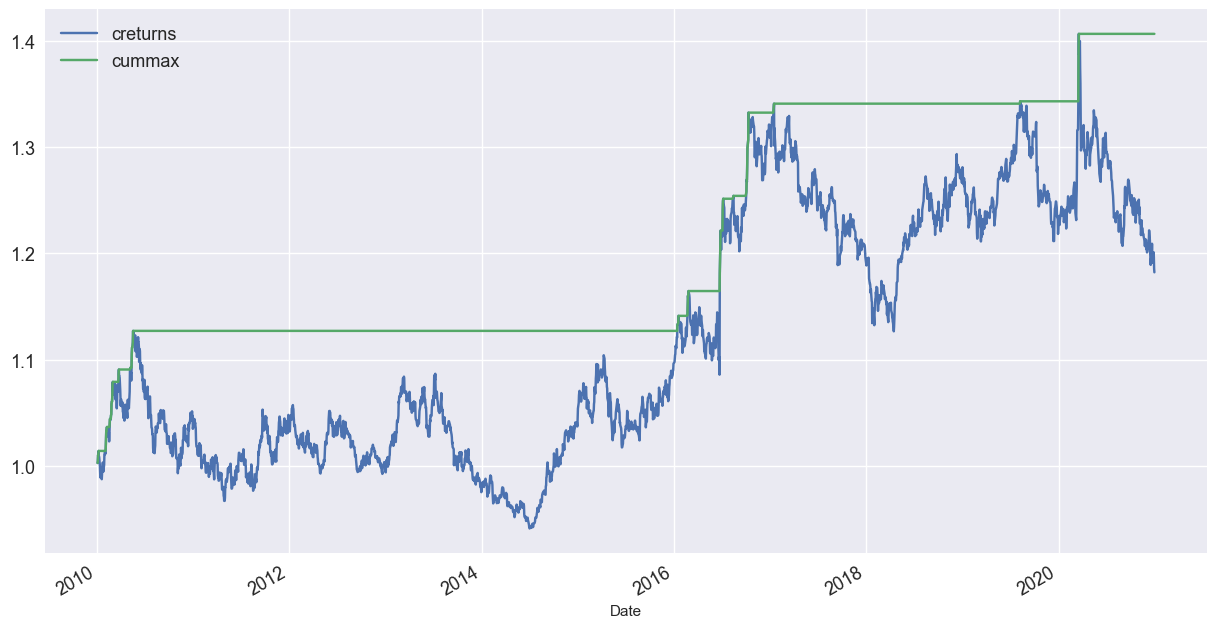

In [11]:
instr[["creturns", "cummax"]].plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

__Calculate the drewdown for each every day__


In [12]:
# its the cumelative return (of each day) - cumelative max (of each day)
# devide thecumelative max (of each day.)
instr["drawdown"] = -(instr["creturns"] - instr["cummax"]) / instr["cummax"] # (pos.) drawdown (in %)
instr

,USD_GBP,creturns,cummax,drawdown
Date,,,,
2010-01-02,0.002733,1.002737,1.002737,-0.000000
2010-01-03,0.001727,1.004470,1.004470,-0.000000
2010-01-04,0.005786,1.010299,1.010299,-0.000000
2010-01-05,-0.001687,1.008596,1.010299,0.001686
2010-01-06,0.005446,1.014104,1.014104,-0.000000
...,...,...,...,...
2020-12-23,-0.005004,1.191265,1.406706,0.153152
2020-12-27,0.008278,1.201167,1.406706,0.146114
2020-12-28,-0.003799,1.196612,1.406706,0.149352


__Plot the `cumelative return`, `cumelative max` and `drewdown` ratio__

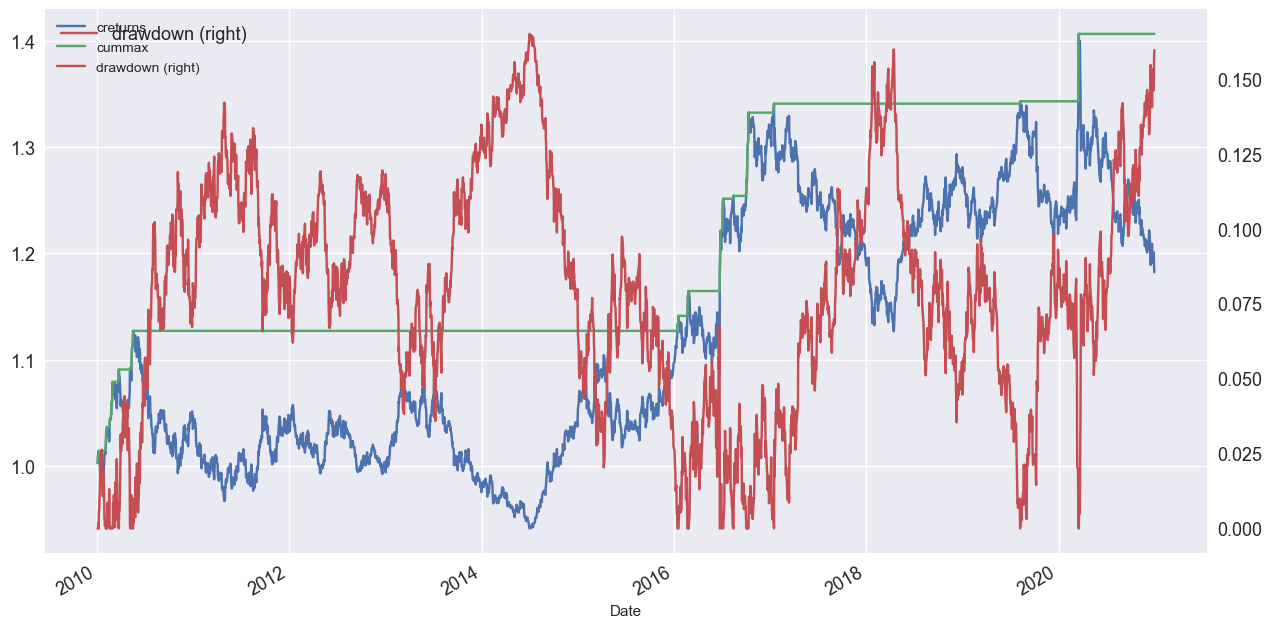

In [18]:
instr[["creturns", "cummax", "drawdown"]].plot(figsize = (15, 8), fontsize = 13, secondary_y = "drawdown")
plt.legend(fontsize = 13)
plt.show()

# Interpretation
# where the cumelative return is lower from the current pick, 
# the drewdown be more higher.

In [14]:
# extract the highest drewdown value
max_drawdown = instr.drawdown.max() # maximum drawdown
max_drawdown

0.16497535855343645

In [15]:
instr.drawdown.idxmax() # maximum drawdown date 

Timestamp('2014-07-01 00:00:00')

In [16]:
# See the date of the max drewdown
instr.loc[instr.drawdown.idxmax()]

USD_GBP    -0.000915
creturns    0.941169
cummax      1.127116
drawdown    0.164975
Name: 2014-07-01 00:00:00, dtype: float64

In [17]:
# the drewdoan:
(0.941169 - 1.127116) / 1.127116

-0.16497592084576918

> Note: past drewdown performance is not the the best indicator for the future, but its defently give us some prespective to the most worst risk scenario of an instrument of a time period. After all its a good measure and indicator for the tail risk.

---

# Calmar Ratio

> The Calmar Ratio is a risk-adjusted performance metric. __Its basically the ratio between the `CAGR` and the `max drewdown`.__



__Interpretation:__
- __Higher Calmar Ratio__:
    - A higher Calmar Ratio is generally desirable as it indicates a better risk-adjusted performance.
    - It suggests that the investment has achieved a higher average annual return relative to its maximum drawdown, signaling efficient risk management.

- __Lower Calmar Ratio:__
    - A lower Calmar Ratio may indicate that the investment's return is not compensating for its maximum drawdown effectively.
    - It suggests that the risk-adjusted performance may be less favorable.

In [19]:
max_drawdown

0.16497535855343645

In [20]:
# Compute the: Compute annualize growth rate
cagr = np.exp(instr[symbol].sum())**(1/((instr.index[-1] - instr.index[0]).days / 365.25)) - 1 
cagr

0.015347769017337587

In [21]:
calmar = cagr / max_drawdown
calmar

0.0930306753197106

---

# Max Drawdown Duration

> So in the historical best case, how long did it take to recover from the longest temporary drawdown ?

- >  _the maximum drawdown duration is the answer to this question._


In [22]:
instr

,USD_GBP,creturns,cummax,drawdown
Date,,,,
2010-01-02,0.002733,1.002737,1.002737,-0.000000
2010-01-03,0.001727,1.004470,1.004470,-0.000000
2010-01-04,0.005786,1.010299,1.010299,-0.000000
2010-01-05,-0.001687,1.008596,1.010299,0.001686
2010-01-06,0.005446,1.014104,1.014104,-0.000000
...,...,...,...,...
2020-12-23,-0.005004,1.191265,1.406706,0.153152
2020-12-27,0.008278,1.201167,1.406706,0.146114
2020-12-28,-0.003799,1.196612,1.406706,0.149352


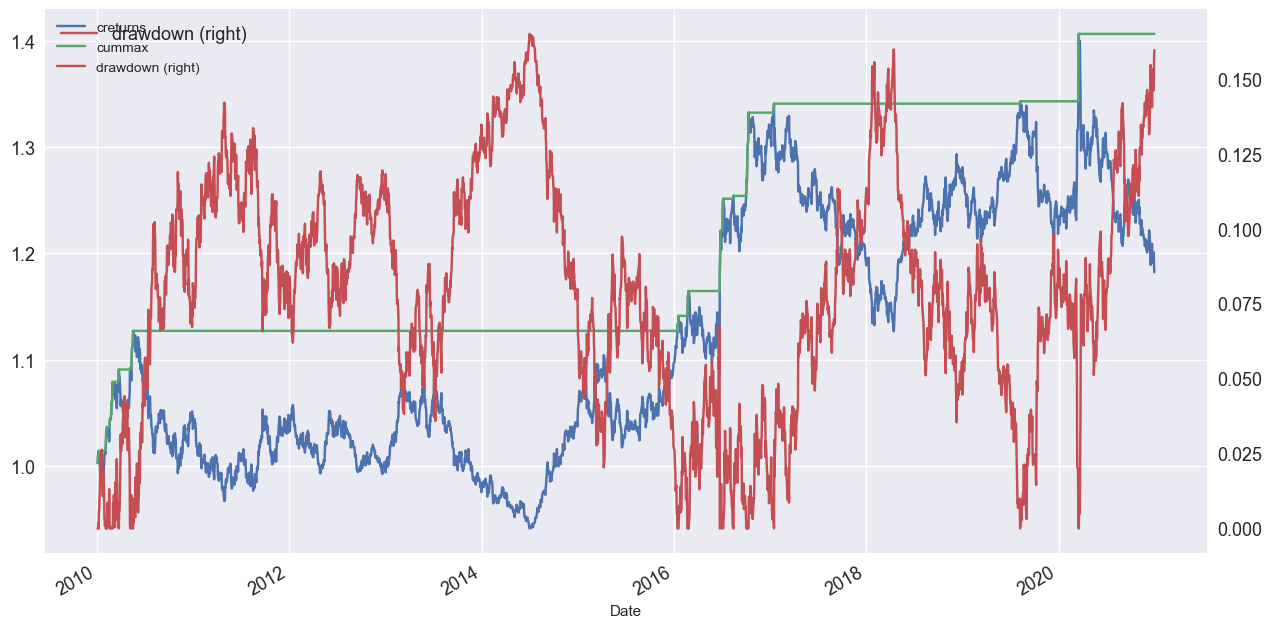

In [23]:
instr[["creturns", "cummax", "drawdown"]].plot(figsize = (15, 8), fontsize = 13, secondary_y = "drawdown")
plt.legend(fontsize = 13)
plt.show()

In [24]:
drawdown = instr.drawdown.copy()
drawdown

Date
2010-01-02   -0.000000
2010-01-03   -0.000000
2010-01-04   -0.000000
2010-01-05    0.001686
2010-01-06   -0.000000
                ...   
2020-12-23    0.153152
2020-12-27    0.146114
2020-12-28    0.149352
2020-12-29    0.157019
2020-12-30    0.159554
Name: drawdown, Length: 3139, dtype: float64

- __Drawdown Period__: Time Period between peaks 
- __recall__: whenever drawdown == 0, a new peak has been reached

In [25]:
# get all peak dates (beginning of Drawdown periods)
begin = drawdown[drawdown == 0].index 
begin

# Interpretation:
# the first drewdown start in 2010-01-02, and ends in 2010-01-03.
# and so on....

DatetimeIndex(['2010-01-02', '2010-01-03', '2010-01-04', '2010-01-06',
               '2010-02-02', '2010-02-03', '2010-02-04', '2010-02-06',
               '2010-02-07', '2010-02-17', '2010-02-18', '2010-02-22',
               '2010-02-23', '2010-02-24', '2010-02-25', '2010-02-26',
               '2010-02-27', '2010-02-28', '2010-03-01', '2010-03-23',
               '2010-03-24', '2010-05-06', '2010-05-07', '2010-05-12',
               '2010-05-13', '2010-05-15', '2010-05-16', '2010-05-17',
               '2016-01-14', '2016-01-17', '2016-01-18', '2016-02-21',
               '2016-02-22', '2016-02-23', '2016-02-25', '2016-06-23',
               '2016-06-26', '2016-07-04', '2016-07-05', '2016-07-06',
               '2016-08-14', '2016-10-02', '2016-10-03', '2016-10-05',
               '2016-10-06', '2016-10-09', '2016-10-10', '2017-01-15',
               '2019-08-08', '2020-03-17', '2020-03-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [26]:
# get the corresponding end dates for all Drawdown periods
end = begin[1:] 
# add last available date
end = end.append(pd.DatetimeIndex([drawdown.index[-1]]))
end

# you basicaly shift the dates 1 step back

DatetimeIndex(['2010-01-03', '2010-01-04', '2010-01-06', '2010-02-02',
               '2010-02-03', '2010-02-04', '2010-02-06', '2010-02-07',
               '2010-02-17', '2010-02-18', '2010-02-22', '2010-02-23',
               '2010-02-24', '2010-02-25', '2010-02-26', '2010-02-27',
               '2010-02-28', '2010-03-01', '2010-03-23', '2010-03-24',
               '2010-05-06', '2010-05-07', '2010-05-12', '2010-05-13',
               '2010-05-15', '2010-05-16', '2010-05-17', '2016-01-14',
               '2016-01-17', '2016-01-18', '2016-02-21', '2016-02-22',
               '2016-02-23', '2016-02-25', '2016-06-23', '2016-06-26',
               '2016-07-04', '2016-07-05', '2016-07-06', '2016-08-14',
               '2016-10-02', '2016-10-03', '2016-10-05', '2016-10-06',
               '2016-10-09', '2016-10-10', '2017-01-15', '2019-08-08',
               '2020-03-17', '2020-03-18', '2020-12-30'],
              dtype='datetime64[ns]', freq=None)

In [35]:
# See? the end is shiftet one step back
print(begin[:4])
print(end[:4])

DatetimeIndex(['2010-01-02', '2010-01-03', '2010-01-04', '2010-01-06'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2010-01-03', '2010-01-04', '2010-01-06', '2010-02-02'], dtype='datetime64[ns]', freq=None)


In [27]:
# and then we can compute the different between that dates:
periods = end - begin # time difference between peaks
periods

TimedeltaIndex([   '1 days',    '1 days',    '2 days',   '27 days',
                   '1 days',    '1 days',    '2 days',    '1 days',
                  '10 days',    '1 days',    '4 days',    '1 days',
                   '1 days',    '1 days',    '1 days',    '1 days',
                   '1 days',    '1 days',   '22 days',    '1 days',
                  '43 days',    '1 days',    '5 days',    '1 days',
                   '2 days',    '1 days',    '1 days', '2068 days',
                   '3 days',    '1 days',   '34 days',    '1 days',
                   '1 days',    '2 days',  '119 days',    '3 days',
                   '8 days',    '1 days',    '1 days',   '39 days',
                  '49 days',    '1 days',    '2 days',    '1 days',
                   '3 days',    '1 days',   '97 days',  '935 days',
                 '222 days',    '1 days',  '287 days'],
               dtype='timedelta64[ns]', freq=None)

In [28]:
max_ddd = periods.max() # max drawdown duration
max_ddd

Timedelta('2068 days 00:00:00')

In [29]:
max_ddd.days

2068

---

# Putting everything together
> Create some functions to calculate the __`maximum drawdown`__, the __`Colma ratio`__ and the __`maximum drawdown duration`__

In [ ]:
import pandas as pd
import numpy as np

In [40]:
returns = pd.read_csv("../Data/returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


In [41]:
# Calculate the max drewdown

def max_drawdown(series):
    creturns = series.cumsum().apply(np.exp) # cumelative return
    cummax = creturns.cummax()               # cumelative max return
    drawdown = (cummax - creturns)/cummax    # compute drew down
    max_dd = drawdown.max()                  # grab the max frew down 
    return max_dd

In [42]:
returns.apply(max_drawdown).sort_values()

Neutral    0.000000
Low_Vol    0.085782
USD_GBP    0.164975
Random     0.217351
GBP_USD    0.330941
Levered    0.362758
dtype: float64

In [43]:
# Function to compute the:
# Compund annualize growth rate
def calculate_cagr(series):
    # apply exponent of the sum of log return, than power it 1/days in year.
    return np.exp(series.sum())**(1/((series.index[-1] - series.index[0]).days / 365.25)) - 1

In [44]:
# Calculate the clamer ratio.
# this is the ratio betweem:
# CAGR and drewdown risk
def calmar(series):    
    max_dd = max_drawdown(series) # compute the max dredwdon
    if max_dd == 0:
        return np.nan
    else:        
        cagr = calculate_cagr(series) # calculate CAGT        
        calmar = cagr / max_dd # compute clamer ratio 
        return calmar

In [45]:
returns.apply(calmar).sort_values(ascending = False)

Low_Vol    0.155046
USD_GBP    0.093031
Levered    0.063303
Random     0.047303
GBP_USD   -0.045675
Neutral         NaN
dtype: float64

In [46]:
# Compute the maximum drewdown duration (in days)
def max_dd_duration(series):
    creturns = series.cumsum().apply(np.exp) # cumelative return
    cummax = creturns.cummax() # cumelative max 
    drawdown = (cummax - creturns)/cummax # drew down
    
    # all the dates that start a new drwedown 
    begin = drawdown[drawdown == 0].index 
    # all the dates that the drewdown period is over
    end = begin[1:]  
    end = end.append(pd.DatetimeIndex([drawdown.index[-1]]))
    # compute the days different betwen starts and ends
    periods = end - begin
    # take the max duration
    max_ddd = periods.max()
    return max_ddd.days   

In [47]:
returns.apply(max_dd_duration).sort_values()

Neutral       4
Low_Vol    1188
Random     1800
USD_GBP    2068
Levered    2108
GBP_USD    2374
dtype: int64